In [13]:
import pandas as pd #data preprocessing
import itertools #confusion metrix
import string
import pickle
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
# to show all the rows of pandas dataframe
pd.set_option('display.max_rows', None)

In [19]:
df=pd.read_csv("../data/drugsComTest_raw.csv")

In [20]:
df.head()

uniqueID         drugName                     condition  \
0    163740      Mirtazapine                    Depression   
1    206473       Mesalamine  Crohn's Disease, Maintenance   
2    159672          Bactrim       Urinary Tract Infection   
3     39293         Contrave                   Weight Loss   
4     97768  Cyclafem 1 / 35                 Birth Control   

                                              review  rating       date  \
0  "I&#039;ve tried a few antidepressants over th...      10  28-Feb-12   
1  "My son has Crohn&#039;s disease and has done ...       8  17-May-09   
2                      "Quick reduction of symptoms"       9  29-Sep-17   
3  "Contrave combines drugs that were used for al...       9   5-Mar-17   
4  "I have been on this birth control for one cyc...       9  22-Oct-15   

   usefulCount  
0           22  
1           17  
2            3  
3           35  
4            4

In [21]:
df.condition.value_counts()

condition
Birth Control                                                     9648
Depression                                                        3095
Pain                                                              2100
Anxiety                                                           1908
Acne                                                              1847
Bipolar Disorde                                                   1380
Weight Loss                                                       1248
Insomnia                                                          1231
Obesity                                                           1189
ADHD                                                              1126
Emergency Contraception                                            827
Vaginal Yeast Infection                                            811
Diabetes, Type 2                                                   808
High Blood Pressure                                                

In [22]:
df_train = df[(df['condition']=='Birth Control') | (df['condition']=='Depression') | (df['condition']=='High Blood Pressure')|(df['condition']=='Diabetes, Type 2')]

In [23]:
df.shape

(53766, 7)

In [24]:
df_train.shape

(14334, 7)

In [25]:
X = df_train.drop(['uniqueID', 'drugName', 'rating', 'date', 'usefulCount'],axis=1)

#### EDA

In [26]:
X.condition.value_counts()

condition
Birth Control          9648
Depression             3095
Diabetes, Type 2        808
High Blood Pressure     783
Name: count, dtype: int64

In [27]:
X.head()

condition                                             review
0      Depression  "I&#039;ve tried a few antidepressants over th...
4   Birth Control  "I have been on this birth control for one cyc...
6   Birth Control  "I&#039;ve had the copper coil for about 3 mon...
9   Birth Control  "I was on this pill for almost two years. It d...
30  Birth Control  "I absolutely love this product and recommend ...

In [28]:
# segregating dataframe for analyzing individual condition
X_birth=X[(X['condition']=='Birth Control')]
X_dep=X[(X['condition']=='Depression')]
X_bp=X[(X['condition']=='High Blood Pressure')]
X_diab=X[(X['condition']=='Diabetes, Type 2')]

In [29]:
X_birth.review

4        "I have been on this birth control for one cyc...
6        "I&#039;ve had the copper coil for about 3 mon...
9        "I was on this pill for almost two years. It d...
30       "I absolutely love this product and recommend ...
37       "I was on this for 5 years (and birth control ...
43       "I&#039;m absolutely DONE taking this horrible...
45       "I started on the oral contraceptive pill but ...
46       "About two months ago I had to switch from LoL...
50       "I&#039;ve had this birth control for a year n...
53       "So I first got the nexplanon in July of 2014,...
54       "I started off by taking regular Ortho Tri Cyc...
61       "honestly the measurement hurt more than the a...
70       "I was started on Gildess 1/20 but then was sw...
74       "I had paragard for a year and a half and had ...
76       "I just started taking this birth control abou...
85       "I read so many bad experiences and horror sto...
90       "I&#039;m on my second implant. The first was .

Text(0.5, 1.0, 'Word cloud for Birth control')

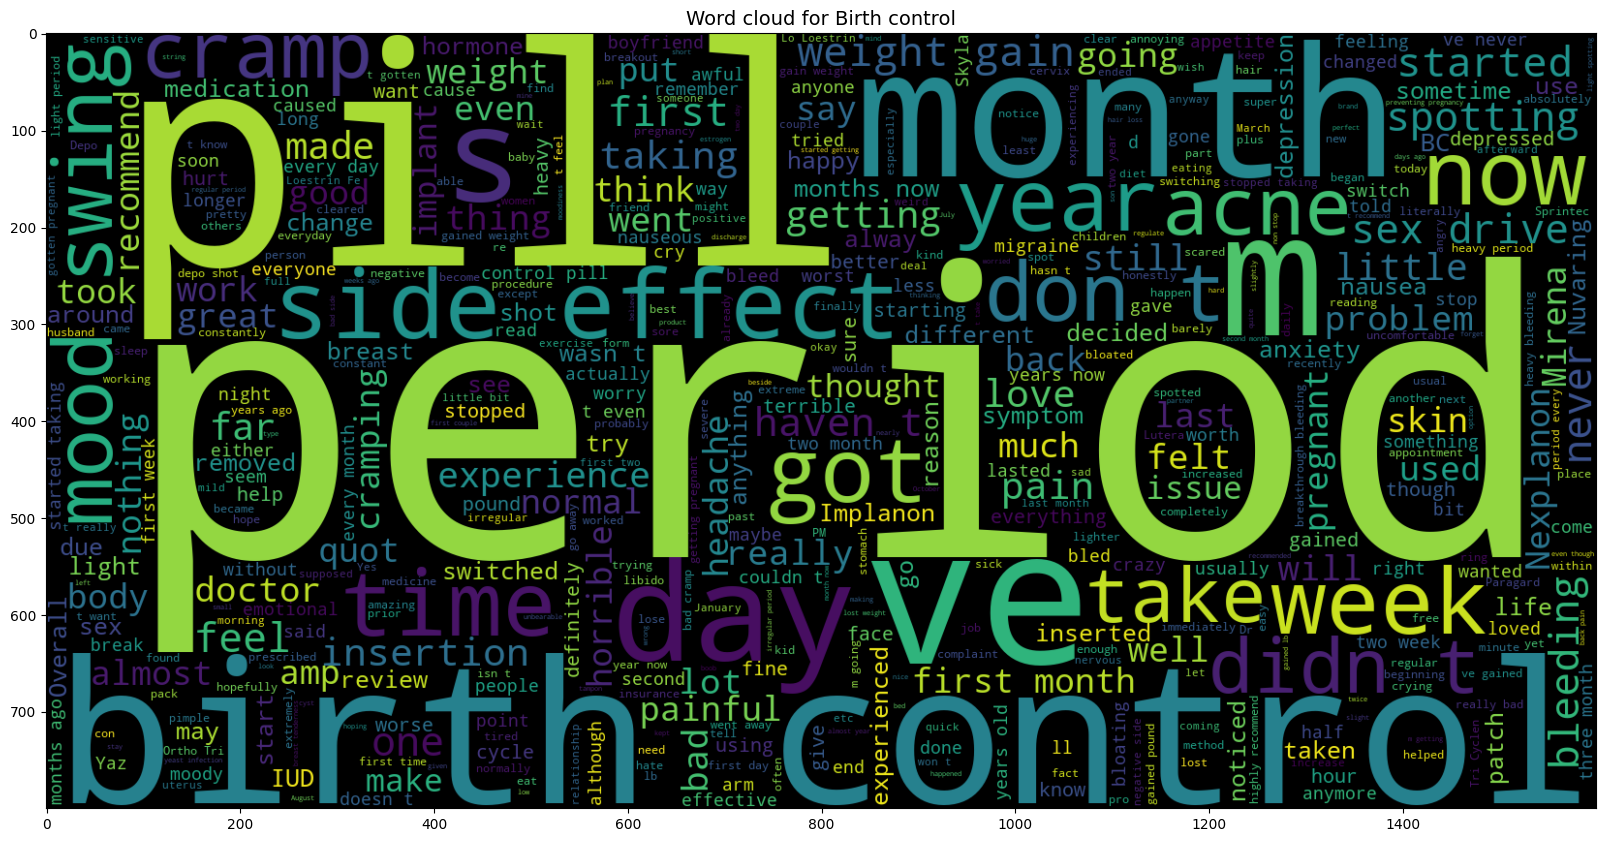

In [31]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_birth.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Birth control',fontsize=14)

Text(0.5, 1.0, 'Word cloud for Depression')

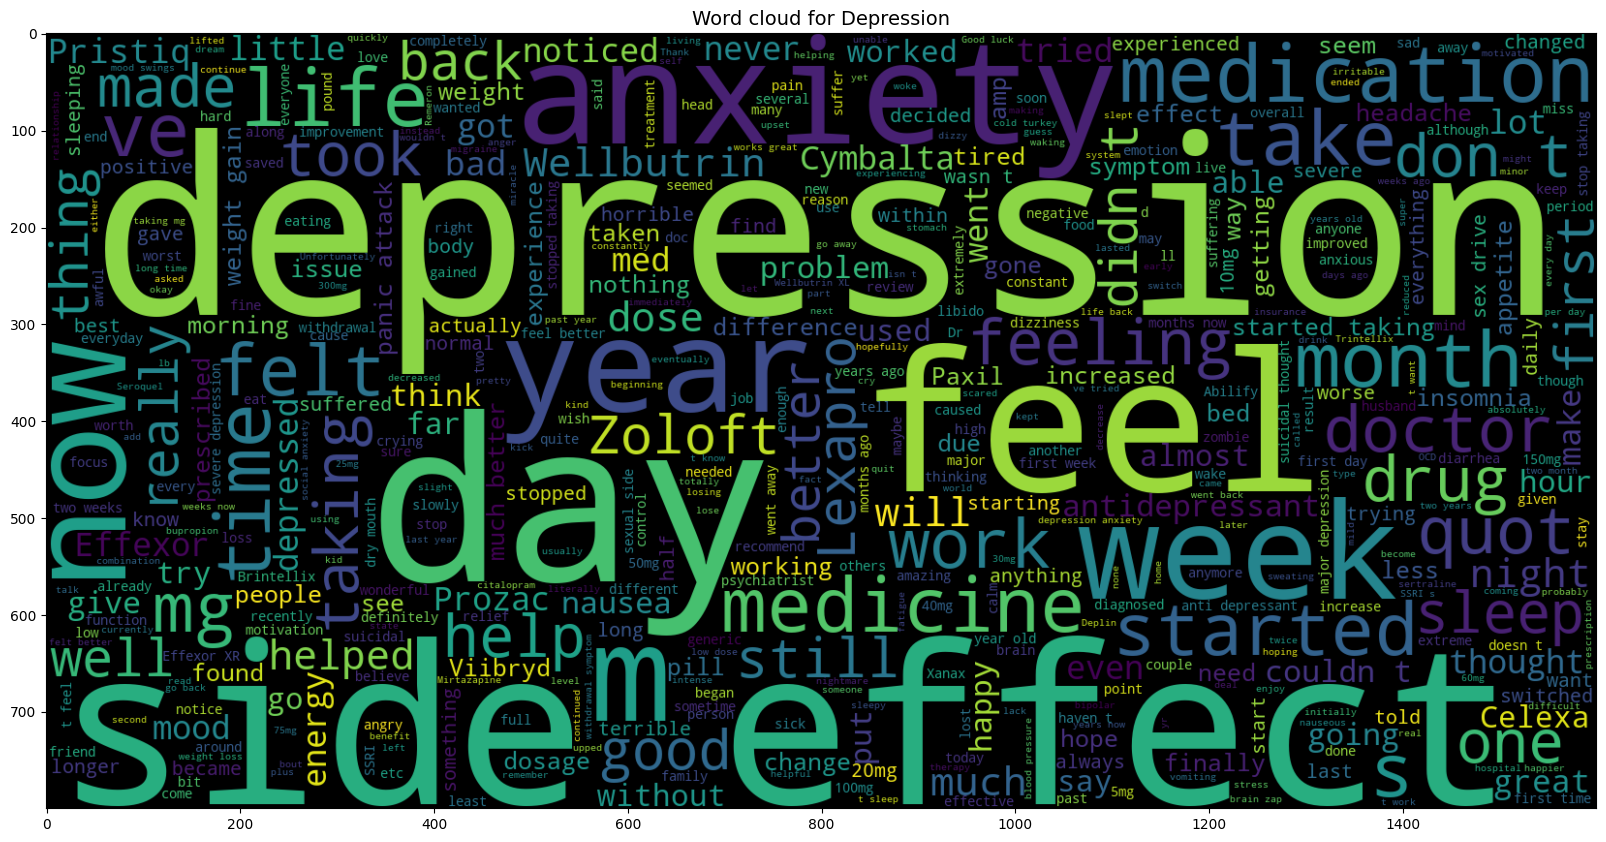

In [32]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_dep.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Depression',fontsize=14)

Text(0.5, 1.0, 'Word cloud for High Blood Pressure')

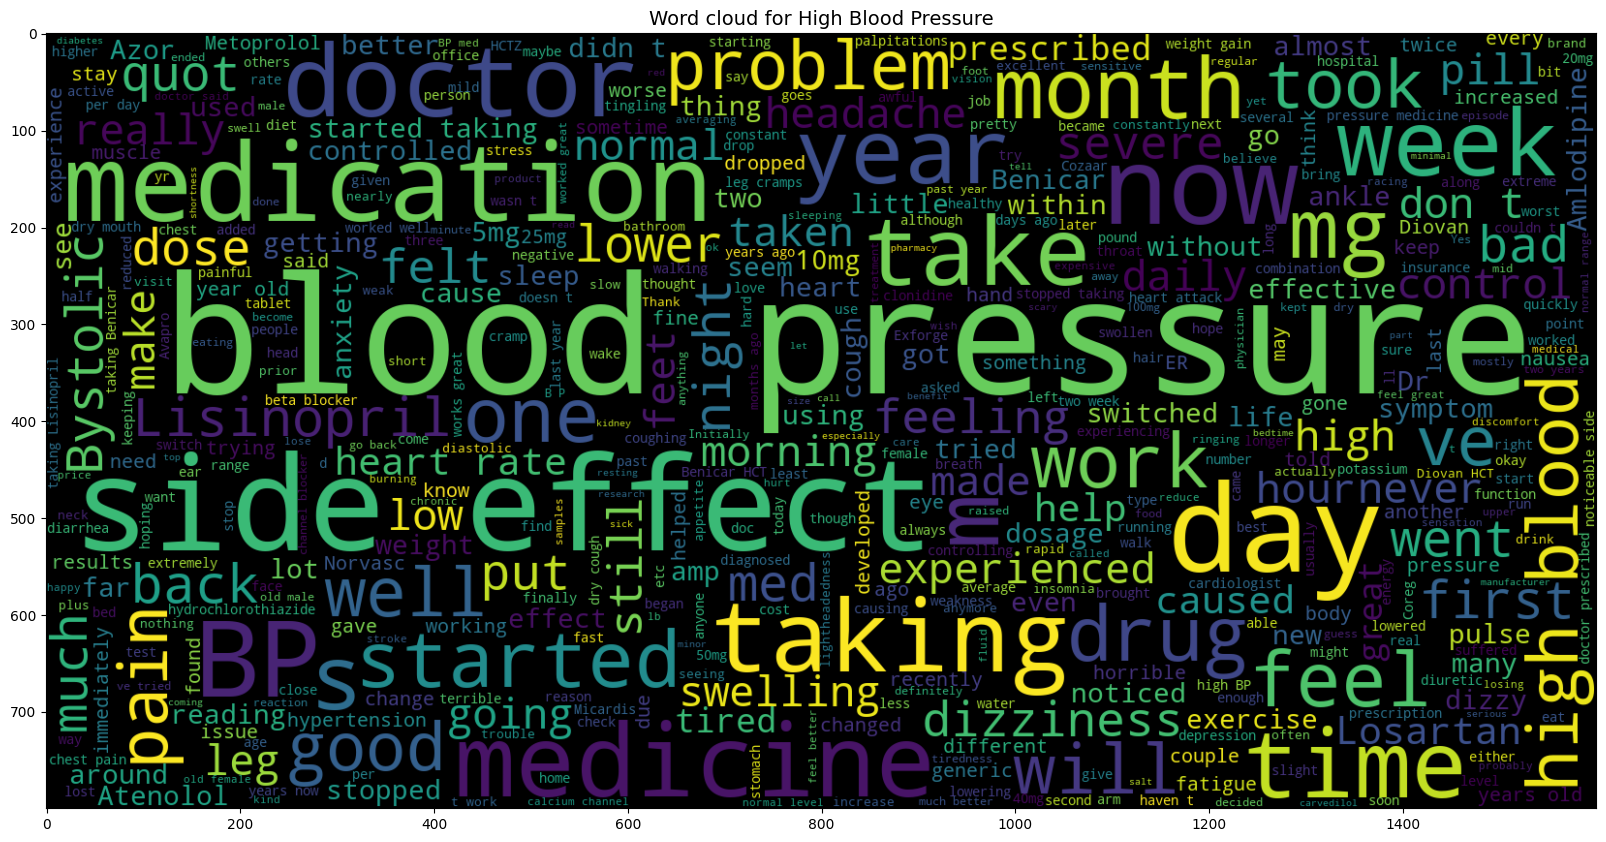

In [33]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_bp.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for High Blood Pressure',fontsize=14)

Text(0.5, 1.0, 'Word cloud for Diabetes Type 2')

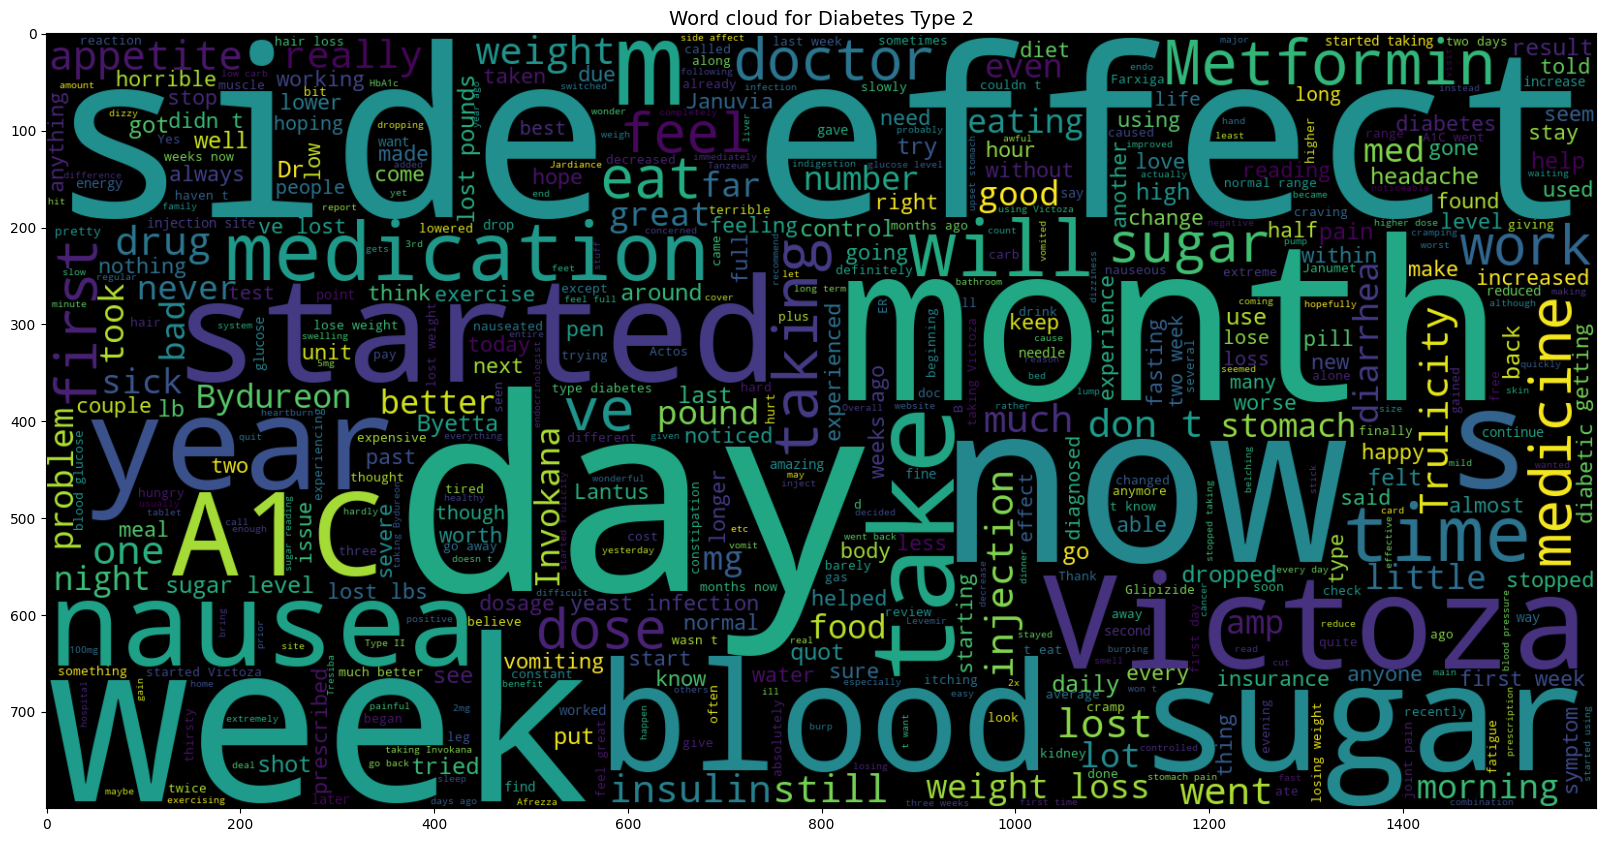

In [34]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_diab.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Diabetes Type 2',fontsize=14)

#### Data Preprocessing

In [36]:
# Check the length of your DataFrame
print(len(X))

14334


In [37]:
# Check the type of the index
print(X.index)


Index([    0,     4,     6,     9,    30,    35,    37,    38,    43,    45,
       ...
       53711, 53717, 53718, 53720, 53724, 53732, 53741, 53759, 53760, 53763],
      dtype='int64', length=14334)


In [38]:
# Check the columns in your DataFrame
print(X.columns)


Index(['condition', 'review'], dtype='object')


In [40]:
X['review'][4]

'"I have been on this birth control for one cycle. After reading some of the reviews on this type and similar birth controls I was a bit apprehensive to start. Im giving this birth control a 9 out of 10 as I have not been on it long enough for a 10. So far I love this birth control! My side effects have been so minimal its like Im not even on birth control! I have experienced mild headaches here and there and some nausea but other than that ive been feeling great! I got my period on cue on the third day of the inactive pills and I had no idea it was coming because I had zero pms! My period was very light and I barely had any cramping! I had unprotected sex the first month and obviously didn&#039;t get pregnant so I&#039;m very pleased! Highly recommend"'

In [41]:
X['review'][30]

'"I absolutely love this product and recommend to everyone. I know everyone&#039;s body is different, so it is not for everyone, but it is not the medicines fault. I have NO negative symptoms since I started this. I used to have heavy periods, terrible cramps and headaches, and my periods were super long. I now have super consistent 3-4 LIGHT periods, no cramps or headaches. I have been on this pill for over a year now and have no desire to switch."'

In [42]:
for i, col in enumerate(X.columns):
    X.iloc[:, i] = X.iloc[:, i].str.replace('"', '')

In [43]:
# To set the width of the column to maximum
pd.set_option('max_colwidth', 1)

In [44]:
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rishm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

#### Lemmitziaion

#### Lemmatization is a text pre-processing technique used in natural language processing (NLP) models to break a word down to its root meaning to identify similarities. For example, a lemmatization algorithm would reduce the word better to its root word, or lemme, good.

In [46]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

porter = PorterStemmer()

lemmatizer = WordNetLemmatizer()

In [47]:
print(porter.stem("sportingly"))
print(porter.stem("very"))
print(porter.stem("troubled"))

sportingli
veri
troubl


In [48]:
from bs4 import BeautifulSoup
import re

In [49]:
def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stop]
    # 6. lemmitization
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(lemmitize_words))

In [50]:
import nltk
nltk.download('omw-1.4')
from nltk.corpus import wordnet
X['review_clean'] = X['review'].apply(review_to_words)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\rishm\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
C:\Users\rishm\AppData\Local\Temp\ipykernel_9496\2066199760.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()


In [51]:
X.head()

condition  \
0   Depression      
4   Birth Control   
6   Birth Control   
9   Birth Control   
30  Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      review  \
0   I&#039;ve tried a few antidepressants over the years (citalopram, fluoxetine, amitriptyline), but none of those helped with my depression, insomnia &amp; anxiety. My doctor suggested and changed me onto 45mg mirtazapine and this medicine has saved my life. Thankfully I have had no side effects especially the most common - weight gain, I&#039;ve actually lost alot of weight. I still have suicidal thoughts but mirtazapine has saved me.                                                                                                                                                                                                                                                                                                                                      
4   I have been on this birth control for one cycle. After reading some of the reviews on this type and similar birth controls I was a bit apprehensive to start. Im giving this birth control a 9 out of 10 as I have not been on it long enough for a 10. So far I love this birth control! My side effects have been so minimal its like Im not even on birth control! I have experienced mild headaches here and there and some nausea but other than that ive been feeling great! I got my period on cue on the third day of the inactive pills and I had no idea it was coming because I had zero pms! My period was very light and I barely had any cramping! I had unprotected sex the first month and obviously didn&#039;t get pregnant so I&#039;m very pleased! Highly recommend   
6   I&#039;ve had the copper coil for about 3 months now. I was really excited at the thought of not taking hormones. I&#039;m good with pain however I nearly fainted with insertion, couldn&#039;t belive how painful it was; the doctor did say it is very painful for some. Well 3 months in, my periods last 11 days and I&#039;m in pain for about 15 days with random twangs especially in the left side and I&#039;m considering whether I want to put up with the intense pain and heavy periods. I&#039;d recommend this 100% to somebody who doesn&#039;t already have heavy painful periods but right now it just isn&#039;t for me                                                                                                                                                
9   I was on this pill for almost two years. It does work as far as not getting pregnant however my experience at first was it didn&#039;t make a huge difference then 6 or 7 months into it my sex drive went down, along with being very very dry, my moodiness increased drastically. I would cry one second and then get angry with my husband over anything and everything. My skin has gotten a lot worse, I broke out in places I never had in the last week. So now I am on Yaz.                                                                                                                                                                                                                                                                                                       
30  I absolutely love this product and re

### Creating Features and Target Tables

In [52]:
X_feat=X['review_clean']
y=X['condition']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_feat, y,stratify=y,test_size=0.2, random_state=0)

In [54]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Bag of words

In [55]:
count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(X_train)

count_test = count_vectorizer.transform(X_test)

In [56]:
count_train

<11467x11052 sparse matrix of type '<class 'numpy.int64'>'
	with 365954 stored elements in Compressed Sparse Row format>

### Machine Learning Model : Naive Bayes

accuracy:   0.971
Confusion matrix, without normalization


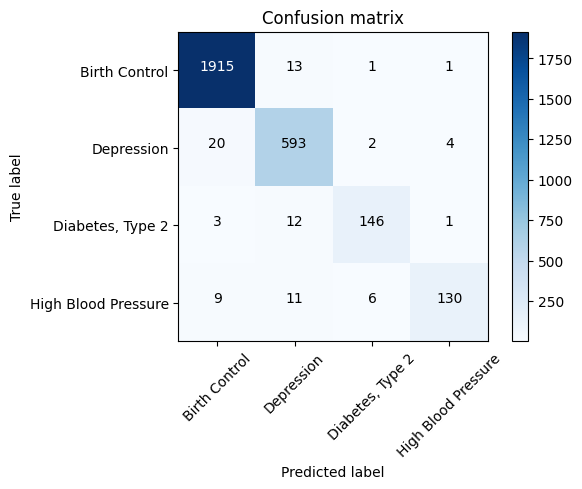

In [57]:
mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

### Machine Learning Model : Passive Aggressive Classifier

accuracy:   0.960
Confusion matrix, without normalization


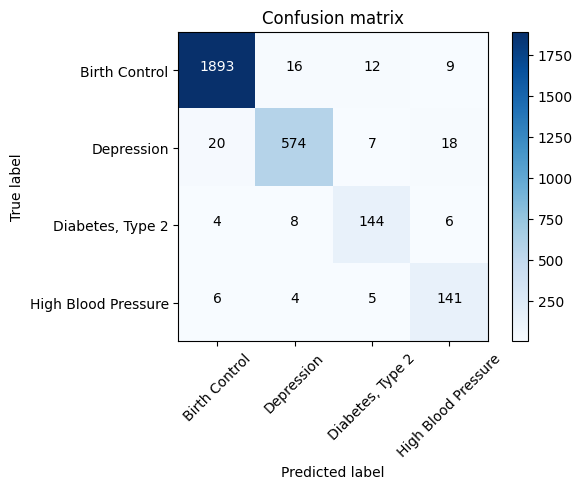

In [58]:
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression

passive = PassiveAggressiveClassifier()
passive.fit(count_train, y_train)
pred = passive.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

### TFIDF

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)

### Machine Learning Model : Naive Bayes

accuracy:   0.877
Confusion matrix, without normalization


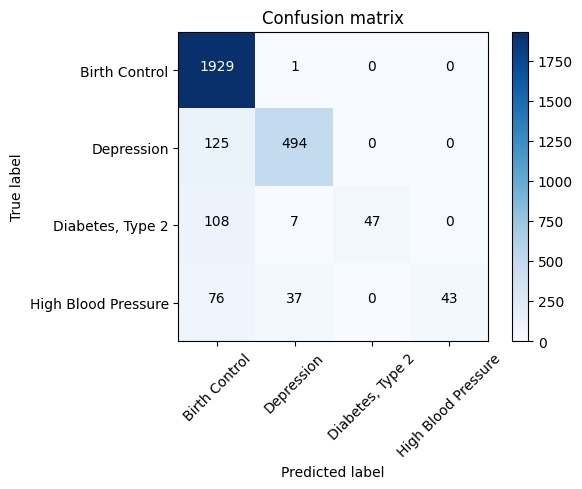

In [60]:
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train_2, y_train)
pred = mnb_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

### Machine Learning Model TFIDF

In [61]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer2.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer2.transform(X_test)

accuracy:   0.973
Confusion matrix, without normalization


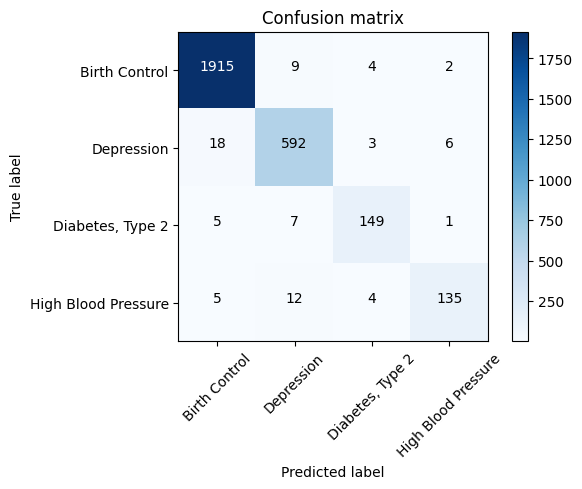

In [62]:
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_2, y_train)
pred = pass_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

### TFIDF : Trigrams

accuracy:   0.972
Confusion matrix, without normalization


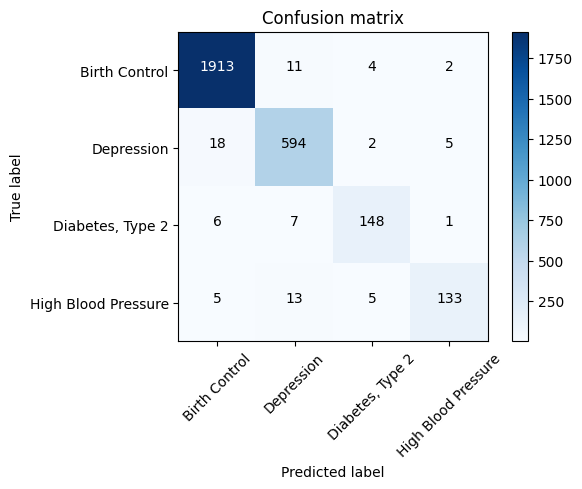

In [63]:
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
tfidf_train_3 = tfidf_vectorizer3.fit_transform(X_train)
tfidf_test_3 = tfidf_vectorizer3.transform(X_test)

passive_tf = PassiveAggressiveClassifier()
passive_tf.fit(tfidf_train_3, y_train)
pred = passive_tf.predict(tfidf_test_3)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

### Most important Features

In [64]:
def most_informative_feature_for_class(vectorizer, classifier, classlabel, n=10):
    labelid = list(classifier.classes_).index(classlabel)
    feature_names = vectorizer.get_feature_names_out() 
    topn = sorted(zip(classifier.coef_[labelid], feature_names))[-n:]

    for coef, feat in topn:
        print (classlabel, feat, coef)



most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'Birth Control')

Birth Control visiting 0.730222101829437
Birth Control wanna 0.730222101829437
Birth Control revealed 0.7651366885185381
Birth Control pychologist 0.8047113919438305
Birth Control seat 0.9361351229318208
Birth Control refereed 0.9402634612129926
Birth Control heel 1.077164499564976
Birth Control toothpaste 1.4608061021875935
Birth Control yasmine 1.8528345015265806
Birth Control blinding 4.907764002659096


In [65]:
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'Depression')

Depression unjustified 0.8931196504712253
Depression fbs 0.981452481574593
Depression lactate 1.2153629215383337
Depression havoc 1.2581934527193142
Depression intermittent 1.4240167104504202
Depression maxzide 1.5301307156752617
Depression mcdonald 1.8053742535407562
Depression accomplished 2.405029097415282
Depression misinformed 2.6514206679745738
Depression menstral 3.592129120069119


In [66]:
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'High Blood Pressure')

High Blood Pressure bc 0.7207922946197891
High Blood Pressure bb 0.8071244405211988
High Blood Pressure tighten 0.8294405142780211
High Blood Pressure spontaneously 0.8548294340607696
High Blood Pressure soundtrack 0.8870181439919453
High Blood Pressure biotics 0.9032588323259698
High Blood Pressure livelier 1.918796929140797
High Blood Pressure jabbing 1.9532173179273216
High Blood Pressure wreckn 2.053570027221266
High Blood Pressure spinal 2.511899979850986


### Sample Predictions

In [67]:
X.tail()

condition  \
53732  Depression      
53741  Birth Control   
53759  Birth Control   
53760  Birth Control   
53763  Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           review  \
53732  I&#039;m a 19 year old girl and I&#039;ve been suffering from major depression and social anxiety for the past 5 years. I finally went to the doctors and was prescribed Lexapro 10mg. I&#039;ve been on it for 4 days now. I had side effects the first day I took it - nausea, slight headache, slight dizziness, sleepy and yawning a lot and most annoyingly INSOMNIA! I even felt a little confused at bedtime while trying to sleep. The side effects lasted for the first 3 days, now they&#039;re slowly going away. The first day I was really hyper and the next I was so tired but now it&#039;s starting to balance out and I can sleep better. I haven&#039;t had a depressing day since I&#039;ve been taking Lexapro so lets hope it stays that way.                                          
53741  I first would like to thank all of you that posted comments. After reading them, I felt I&#039;m not alone. It&#039;s not just happening to me, there is nothing wrong with me. I&#039;m 34, with one child and had Mirena for 5 months. The insertion was almost painless and the first month was fine. Right now, I have gained 10lbs, loss of sex drive, have headaches, back pain, insomnia, constipation, hair loss and general depression - OF COURSE that&#039;s going to cause to have mood swings. I&#039;m waiting on an appointment to have it removed. ANOTHER IMPORTANT ASPECT is that I had suffered from postpartum depression after the birth of my child 4 years ago and honestly I was worried that these side effects (especially  depression) were a sign that I was still not okay.     
53759  I was on Microgestin for about 3 years. Over the past year, I started to get extremely bad headaches during the sugar pill week. I took extra strength Tylenol the entire week, twice a day, and it still didn&#039;t make my headaches go away. I also would feel very lightheaded and nauseous. I had to leave work early, it was bad. The only good thing was I&#039;ve had the same box of tampons for the entire year. I barely had a period. Oh yeah, I also got high pigmentation right above my lips. They call it a &quot;pregnancy mask&quot; but you can get it with certain birth control. It is very dark and it is difficult to hide with makeup! I&#039;m not a big fan of having a weird skin mustache so I went off it.                                                                     
53760  I started taking Apri about 7 months ago. My breats got noticeably larger within the first few weeks and I gained about 10 pounds, but I&#039;m a thin girl anyway so I gladly take on the extra few pounds and curves. I got prescribed this birth control because of my ovarian cysts and since I have not had any problems with them. They&#039;ve been unnoticeable and my cramps don&#039;t even exist anymore. I love Apri and it&#039;s affordable. Just what I need in this economic clash.                                                                                                                                                                                                                            

In [68]:
## Function for Extracting Top drugs

def top_drugs_extractor(condition):
    df_top = df[(df['rating']>=9)&(df['usefulCount']>=100)].sort_values(by = ['rating', 'usefulCount'], ascending = [False, False])
    drug_lst = df_top[df_top['condition']==condition]['drugName'].head(3).tolist()
    return drug_lst

In [69]:
def predict_text(lst_text):
    df_test = pd.DataFrame(lst_text, columns = ['test_sent'])
    df_test["test_sent"] = df_test["test_sent"].apply(review_to_words)
    tfidf_bigram = tfidf_vectorizer3.transform(lst_text)
    prediction = passive_tf.predict(tfidf_bigram)
    df_test['prediction']=prediction
    return df_test

In [70]:
sentences = [
  "I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations.",
    "This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap.",
    "I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I am losing so much weight. No side effects yet. Miracle medicine for me",
    
  ]

In [71]:
tfidf_trigram = tfidf_vectorizer3.transform(sentences)


predictions = passive_tf.predict(tfidf_trigram)

for text, label in zip(sentences, predictions):
    if label=="High Blood Pressure":
        target="High Blood Pressure"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Depression":
        target="Depression"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Diabetes, Type 2":
        target="Diabetes, Type 2"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    else:
        target="Birth Control"
        print("text:", text, "\Condition:", target)
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

text: I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations. 
Condition: High Blood Pressure
Top 3 Suggested Drugs:
Telmisartan
Amlodipine
Micardis

text: This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap. 
Condition: Depression
Top 3 Suggested Drugs:
Sertraline
Cymbalta
Citalopram

text: I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I am l

In [72]:
df_testsent = predict_text(sentences)
df_testsent

test_sent  \
0  tekturna day effect immediate also calcium channel blocker tiazac hydrochlorothiazide put tekturna palpitation experienced diovan ugly drug opinion company produce however palpitation pretty bad diovan hour monitor ekg etc day substituting tekturna diovan palpitation   
1  third med tried anxiety mild depression week hate much dizzy major diarrhea feel worse started contacting doc changing asap                                                                                                                                                   
2  got diagnosed type doctor prescribed invokana metformin beginning sugar went normal second week losing much weight side effect yet miracle medicine                                                                                                                           

            prediction  
0  High Blood Pressure  
1  Depression           
2  Diabetes, Type 2

In [75]:
import joblib
joblib.dump(tfidf_vectorizer3, 'model/tfidfvectorizer.pkl')
joblib.dump(passive_tf, 'model/passmodel.pkl')

['model/passmodel.pkl']

In [76]:
vectorizer = joblib.load('model/tfidfvectorizer.pkl')
model = joblib.load('model/passmodel.pkl')

test = model.predict(vectorizer.transform(["I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations"]))
test[0]

'High Blood Pressure'